# Welcome to WoMa

This notebook aims to cover the basic usages of WoMa. Let's get started!

In [1]:
import woma

R_earth = 6371000  # m
M_earth = 5.972E24 # kg m^-3 

### Contents:
1. Spherical planetray profiles
2. Particle placement for spherical planetary profiles
3. Spinning planetary profiles
4. Particle placement for spinning planetary profiles

 ## 1. Spherical planetary profiles

Let us start building a simple spherical 1 layer planet.

We need to specify the following for every single planet we want to build:
- Equation of state for every material: we choose Tillotson granite.
- Relation temperature-density for every material: we choose a power relation $T=K\rho^\alpha$ with $\alpha=0$ (i.e. isothermal).
- Two out of the following three: pressure $P_{\rm s}$, temperature $T_{\rm s}$, and density $\rho_{\rm s}$ at the surface of our planet. We choose $P_{\rm s}=10^5\, \rm Pa$, and $T_{\rm s}=1000\, \rm K$.

In [ ]:
l1_test = woma.Planet(
    name            = "my_first_planet",
    A1_mat_layer    = ['Til_granite'],
    A1_T_rho_type   = ['power=0'],
    P_s             = 1e5,
    T_s             = 1000
    )

For spherical 1 layer planets we need to specify the total radius $R$ or the total mass $M$ of the planet.
We say our planet has $R=R_\oplus$, and a possible maximum mass of $2M_\oplus$. These can also be defined as input in the cell above.

In [ ]:
l1_test.R     = R_earth
l1_test.M_max = 2*M_earth

We now select the appropiate method and the planet gets built.

In [ ]:
l1_test.gen_prof_L1_find_M_given_R()

Let's plot the results.

In [4]:
import matplotlib.pyplot as plt

def plot_spherical_profile(planet):
    
    fig, ax = plt.subplots(2, 2, figsize=(8,8))
    
    ax[0,0].plot(planet.A1_r/R_earth, planet.A1_rho)
    ax[0,0].set_xlabel(r"$r$ $[R_\oplus]$")
    ax[0,0].set_ylabel(r"$\rho$ $[kg/m^3]$")
    ax[0,0].set_yscale("log")
    ax[0,0].set_xlim(0, None)
    
    ax[1,0].plot(planet.A1_r/R_earth, planet.A1_m_enc/M_earth)
    ax[1,0].set_xlabel(r"$r$ $[R_\oplus]$")
    ax[1,0].set_ylabel(r"$M$ $[M_\oplus]$")
    ax[1,0].set_xlim(0, None)
    
    ax[0,1].plot(planet.A1_r/R_earth, planet.A1_P)
    ax[0,1].set_xlabel(r"$r$ $[R_\oplus]$")
    ax[0,1].set_ylabel(r"$P$ $[Pa]$")
    ax[0,1].set_xlim(0, None)
    
    ax[1,1].plot(planet.A1_r/R_earth, planet.A1_T)
    ax[1,1].set_xlabel(r"$r$ $[R_\oplus]$")
    ax[1,1].set_ylabel(r"$T$ $[K]$")
    ax[1,1].set_xlim(0, None)
    
    plt.tight_layout()
    plt.show()

In [ ]:
plot_spherical_profile(l1_test)

As mentioned before, for 1 layer planets we have two options:
- Fix the radius `R` and the maximum mass `M_max`, then the total mass is determined.
- Fix the mass `M` and the maximum radius `R_max`, then the total radius is determined.

Let us try the second option:

In [ ]:
l1_test = woma.Planet(
    name            = "my_second_planet",
    A1_mat_layer    = ['Til_granite'],
    A1_T_rho_type   = ['power=0.12345'], # determine alpha
    P_s             = 1e5,
    T_s             = 1000,
    M               = M_earth,
    R_max           = 2*R_earth
    )

In [ ]:
l1_test.gen_prof_L1_find_R_given_M()
plot_spherical_profile(l1_test)

Let us continue with 2 layer planets. Let us choose a power relation temperature-density with $\alpha=0.5$ for our core, and $\alpha=1$ for our mantle.

In [ ]:
l2_test = woma.Planet(
    A1_mat_layer    = ['Til_iron', 'Til_granite'],
    A1_T_rho_type   = ['power=0.5', 'power=1.'], # determine alphas
    P_s             = 1e5,
    T_s             = 300
    )

In this case we have many more combinations to determine all the gloval variables of our planet as a function of a few. See `woma.py` for full details.

We can, for instance, determine the mass of every layer `A1_M_layer` and a maximum radius `R_max`, then the boundary and total radius are automatic.

In [ ]:
l2_test.A1_M_layer = [0.3*M_earth, 0.7*M_earth]
l2_test.R_max      = 2*R_earth

l2_test.gen_prof_L2_find_R1_R_given_M1_M2()
plot_spherical_profile(l2_test)

Or, we could determine the total mass `M`, the radius `R`, and the boundary between materials gets automatically computed. Let us choose SESAME EoS for this example with an adiabatic $T(\rho)$ relation for the mantle:

In [ ]:
l2_test = woma.Planet(
    A1_mat_layer    = ['SESAME_iron', 'SESAME_basalt'],
    A1_T_rho_type   = ['power=0.5', 'adiabatic'],
    P_s             = 1e5,
    T_s             = 300,
    M               = M_earth,
    A1_R_layer      = [None, R_earth]               # list with boundary and total radius
    )

In [ ]:
l2_test.gen_prof_L2_find_R1_given_R_M()
plot_spherical_profile(l2_test)

Finally, we have 3 layer planets. In this example we determine the boundary mantle-atmosphere given the mass, radius, and boundary core-mantle

In [ ]:
l3_test = woma.Planet(
    A1_mat_layer    = ['SESAME_iron', 'SESAME_basalt', 'SS08_water'],
    A1_T_rho_type   = ['power=0.5', 'power=0.5', 'power=0.5'],
    P_s             = 1e5,
    T_s             = 300,
    M               = M_earth,
    A1_R_layer      = [0.6*R_earth, None, R_earth]               # list with boundaries and total radius
    )

In [ ]:
l3_test.gen_prof_L3_find_R2_given_R_M_R1()
plot_spherical_profile(l3_test)

In this last example, we determine boundary core-mantle and boundary mantle-atmosphere given the radius, mass and moment of inertia.

In [2]:
l3_test = woma.Planet(
    A1_mat_layer    = ['SESAME_iron', 'SESAME_basalt', 'SESAME_water'],
    A1_T_rho_type   = ['power=0.', 'power=0.', 'power=0.'],
    P_s             = 1,
    T_s             = 500,
    M               = M_earth,
    A1_R_layer      = [None, None, R_earth],               # list with boundaries and total radius
    I_MR2           = 0.3*M_earth*R_earth**2,
    num_attempt     = 5,                                   # Control internal number of iterations
    num_attempt_2   = 5
    )

Finding R1, R2 given R, M, I_MR2: 100%|██████████| 5/5 [00:32<00:00,  6.50s/it]


Tweaking M to avoid peaks at the center of the planet...
Done!
Planet "None": 
    M            = 6.2858e+24 kg = 1.0525 M_earth
    R            = 6.371e+06 m = 1 R_earth
    mat          = ["SESAME_iron", "SESAME_basalt", "SESAME_water"] 
    mat_id       = [300, 301, 302] 
    R_layer      = [0.58266, 0.9869, 1] R_earth
    M_layer      = [0.47816, 0.57416, 0.00014543] M_earth
    M_frac_layer = [0.45432, 0.54554, 0.00013818] M_total
    idx_layer    = [5826, 9868, 9999] 
    P_s          = 1 Pa
    T_s          = 500 K
    rho_s        = 2.9114e-06 kg/m^3
    P_2          = 1.8546e+07 Pa
    T_2          = 500 K
    rho_2        = 2845.6 kg/m^3
    P_1          = 1.3584e+11 Pa
    T_1          = 500 K
    rho_1        = 11560 kg/m^3
    P_0          = 5.2331e+11 Pa
    T_0          = 500 K
    rho_0        = 15753 kg/m^3
    I_MR2        = 0.29524 M_tot*R_tot^2


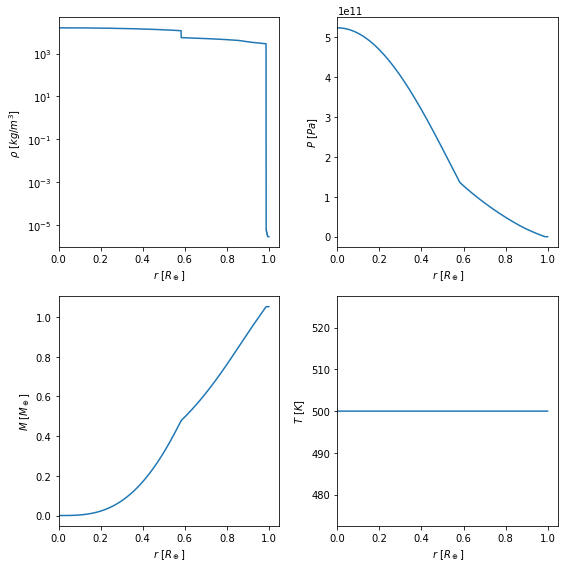

In [5]:
l3_test.gen_prof_L3_find_R1_R2_given_R_M_I()
plot_spherical_profile(l3_test)

## 2. SPH particle placement for spherical profiles

We use the SEA algorithm ([Kegerreis et al. 2019](https://doi.org/10.1093/mnras/stz1606)) to place particles accordingly given a spherical profile.

We use a 2 layer planet generated by woma as an example:

In [6]:
import woma
import seagen

R_earth = 6371000
M_earth = 5.972E24

l2_test = woma.Planet(
    A1_mat_layer    = ['SESAME_iron', 'SESAME_basalt'],
    A1_T_rho_type   = ['power=0.', 'adiabatic'],
    P_s             = 1e5,
    T_s             = 300,
    M               = M_earth,
    A1_R_layer      = [None, R_earth]               # list with boundary and total radius
    )

l2_test.gen_prof_L2_find_R1_given_R_M()

Finding R1 given R, M: 100%|██████████| 40/40 [00:39<00:00,  1.01it/s]


Tweaking M to avoid peaks at the center of the planet...
Done!
Planet "None": 
    M            = 5.9712e+24 kg = 0.99981 M_earth
    R            = 6.371e+06 m = 1 R_earth
    mat          = ["SESAME_iron", "SESAME_basalt"] 
    mat_id       = [300, 301] 
    R_layer      = [0.53185, 1] R_earth
    M_layer      = [0.35797, 0.64184] M_earth
    M_frac_layer = [0.35804, 0.64196] M_total
    idx_layer    = [5318, 9999] 
    P_s          = 1e+05 Pa
    T_s          = 300 K
    rho_s        = 2818.9 kg/m^3
    P_1          = 1.4365e+11 Pa
    T_1          = 676.01 K
    rho_1        = 11661 kg/m^3
    P_0          = 4.5051e+11 Pa
    T_0          = 676.01 K
    rho_0        = 15140 kg/m^3
    I_MR2        = 0.31198 M_tot*R_tot^2


In [8]:
N         = 1e5 # Number of particles
particles = seagen.GenSphere(N, l2_test.A1_r[1:], l2_test.A1_rho[1:], verb=0)

#  SEAGen 
#  https://github.com/jkeger/seagen 


> Interpolating profiles to increase radial density 
> Done interpolating profiles! 


## 3. Spinning planetary profiles

A spinning planetary profile can be described by its equatorial and polar density profiles. This is equivalent to say our planet is a set of constant density oblate spheroids. For full details see [Ruiz-Bonilla et al. 2020](fgdfgdfg).

The easiest way to construct a spheroidal planet in WoMa is starting from a spherical one. Let us construct an arbitrary one:

In [18]:
def plot_spin_profile(spin_planet):
    
    sp = spin_planet
    
    fig, ax = plt.subplots(1,2, figsize=(12,6))
    ax[0].scatter(sp.A1_r/R_earth, sp.A1_rho, label = 'original', s = 0.5)
    ax[0].scatter(sp.A1_r_equator/R_earth, sp.A1_rho_equator, label = 'equatorial profile', s = 1)
    ax[0].scatter(sp.A1_r_pole/R_earth, sp.A1_rho_pole, label = 'polar profile', s = 1)
    ax[0].set_xlabel(r"$r$ [$R_{earth}$]")
    ax[0].set_ylabel(r"$\rho$ [$kg/m^3$]")
    ax[0].legend()
    
    
    r_array_coarse = np.linspace(0, np.max(sp.A1_r_equator), 200)
    z_array_coarse = np.linspace(0, np.max(sp.A1_r_pole), 200)
    rho_grid = np.zeros((r_array_coarse.shape[0], z_array_coarse.shape[0]))
    for i in range(rho_grid.shape[0]):
        radius = r_array_coarse[i]
        for j in range(rho_grid.shape[1]):
            z = z_array_coarse[j]
            rho_grid[i,j] = woma.us.rho_rz(radius, z,
                                      sp.A1_r_equator, sp.A1_rho_equator,
                                      sp.A1_r_pole, sp.A1_rho_pole)
    
    X, Y = np.meshgrid(r_array_coarse/R_earth, z_array_coarse/R_earth)
    Z = rho_grid.T
    levels = np.arange(1000, 15000, 1000)
    ax[1].set_aspect('equal')
    CS = plt.contour(X, Y, Z, levels = levels)
    ax[1].clabel(CS, inline=1, fontsize=10)
    ax[1].set_xlabel(r"$r$ [$R_{earth}$]")
    ax[1].set_ylabel(r"$z$ [$R_{earth}$]")
    ax[1].set_title('Density (Kg/m^3)')
        
    plt.tight_layout()
    plt.show()

In [19]:
import woma
import seagen
import matplotlib.pyplot as plt
import numpy as np

R_earth = 6371000
M_earth = 5.972E24

l2_test = woma.Planet(
    A1_mat_layer    = ['Til_iron', 'Til_granite'],
    A1_T_rho_type   = ['power=0.1', 'power=0.1'],
    P_s             = 1e5,
    T_s             = 3000,
    M               = M_earth,
    A1_R_layer      = [0.5*R_earth, None],               # list with boundary and total radius
    R_max           = 2*R_earth
    )

l2_test.gen_prof_L2_find_R_given_M_R1()

Finding R given M, R1: 100%|██████████| 40/40 [00:12<00:00,  3.37it/s]


Tweaking M to avoid peaks at the center of the planet...
Done!
Planet "None": 
    M            = 5.972e+24 kg = 0.99993 M_earth
    R            = 6.6643e+06 m = 1.046 R_earth
    mat          = ["Til_iron", "Til_granite"] 
    mat_id       = [100, 101] 
    R_layer      = [0.49995, 1.046] R_earth
    M_layer      = [0.29608, 0.70386] M_earth
    M_frac_layer = [0.2961, 0.7039] M_total
    idx_layer    = [4779, 9999] 
    P_s          = 1e+05 Pa
    T_s          = 3000 K
    rho_s        = 1407.4 kg/m^3
    P_1          = 1.5912e+11 Pa
    T_1          = 3493.9 K
    rho_1        = 11608 kg/m^3
    P_0          = 4.282e+11 Pa
    T_0          = 3586.9 K
    rho_0        = 15095 kg/m^3
    I_MR2        = 0.29711 M_tot*R_tot^2


We now, just simply use the `SpinPlanet` class:

Computing spinning profile:  50%|█████     | 10/20 [00:41<00:41,  4.12s/it]

Convergence criteria reached.
Planet "None": 
    M            = 7.218e+24 kg = 1.2086 M_earth
    R_equator    = 7.885e+06 m = 1.2376 R_earth
    R_pole       = 6.0198e+06 m = 0.94488 R_earth
    mat          = ["Til_iron", "Til_granite"] 
    mat_id       = [100, 101] 
    R_layer_eq   = [0.54814, 1.2376] R_earth
    R_layer_pole = [0.46239, 0.94488] R_earth
    M_layer      = [0.32893, 0.87963] M_earth
    M_frac_layer = [0.27217, 0.72783] M_total
    P_s          = 1e+05 Pa
    T_s          = 3003 K
    rho_s        = 1407.4 kg/m^3
    P_1          = 1.5912e+11 Pa
    T_1          = 3493.9 K
    rho_1        = 11608 kg/m^3
    P_0          = 4.282e+11 Pa
    T_0          = 3586.9 K
    rho_0        = 15095 kg/m^3


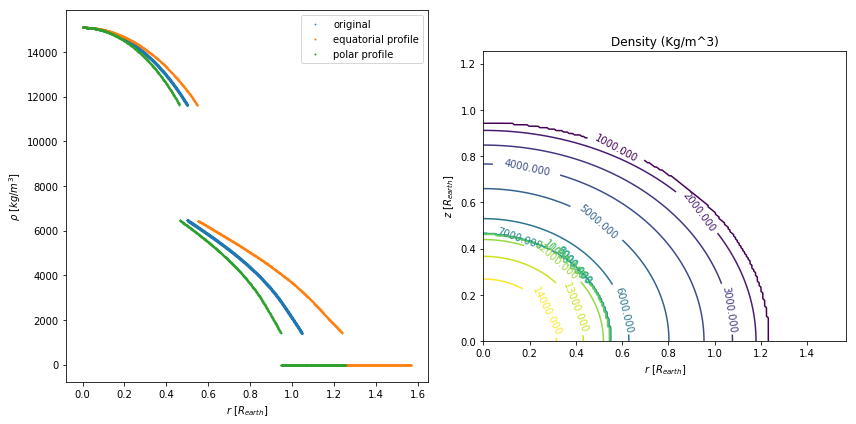

In [20]:
my_spinning_planet = woma.SpinPlanet(
    planet = l2_test,
    Tw     = 3  # hours
    )

my_spinning_planet.spin()

plot_spin_profile(my_spinning_planet)

The code will check for the minimum period available for the planet described automatically.

Note the units of periods are set in hours, the rest of units are SI.

Let's compute the spinning planetary profile of the planet with its minimum period:


Computing spinning profile:  55%|█████▌    | 11/20 [00:40<00:35,  3.89s/it]

Convergence criteria reached.

Minimum period found at 2.3566247438430787 h
Planet "None": 
    M            = 1.1639e+25 kg = 1.9487 M_earth
    R_equator    = 1.2174e+07 m = 1.9109 R_earth
    R_pole       = 5.2811e+06 m = 0.82893 R_earth
    mat          = ["Til_iron", "Til_granite"] 
    mat_id       = [100, 101] 
    R_layer_eq   = [0.61702, 1.9109] R_earth
    R_layer_pole = [0.42032, 0.82893] R_earth
    M_layer      = [0.3783, 1.5704] M_earth
    M_frac_layer = [0.19413, 0.80587] M_total
    P_s          = 1e+05 Pa
    T_s          = 3000 K
    rho_s        = 1407.4 kg/m^3
    P_1          = 1.5912e+11 Pa
    T_1          = 3493.9 K
    rho_1        = 11608 kg/m^3
    P_0          = 4.282e+11 Pa
    T_0          = 3586.9 K
    rho_0        = 15095 kg/m^3


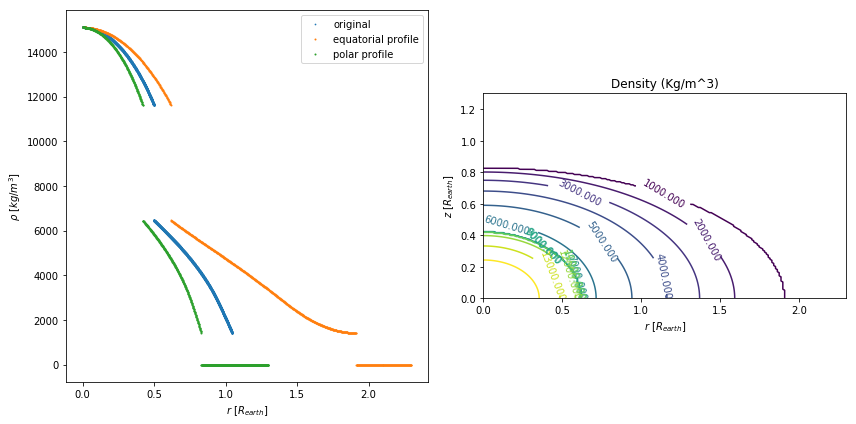

In [21]:
l2_test_spin = woma.SpinPlanet(
    planet  = l2_test,
    R_e_max = 2.3*R_earth,
    R_p_max = 1.3*R_earth,
    Tw      = 0.001     # hours
    )

l2_test_spin.spin()

plot_spin_profile(l2_test_spin)

Note the `spin` method does not have mass conservation. In order to have it, use `spin_planet_fix_M`.

In [ ]:
l2_test_spin = woma.spin_planet_fix_M(planet=l2_test, Tw=10,
                                      R_e_max=1.5*R_earth, R_p_max=1.1*R_earth,
                                      max_iter_1=5, max_iter_2=5)



Computing spinning profile:   0%|          | 0/5 [00:00<?, ?it/s]


Adjusting outer edge:   0%|          | 0/5 [00:00<?, ?it/s]


Adjusting outer edge:  20%|██        | 1/5 [00:21<01:27, 21.88s/it]


Adjusting outer edge:  40%|████      | 2/5 [00:44<01:06, 22.10s/it]


Adjusting outer edge:  60%|██████    | 3/5 [01:15<00:49, 24.71s/it]


Adjusting outer edge:  80%|████████  | 4/5 [01:39<00:24, 24.49s/it]


Adjusting outer edge: 100%|██████████| 5/5 [02:03<00:00, 24.56s/it]


Adjusting core-mantle boundary:   0%|          | 0/5 [00:00<?, ?it/s]

## 4. Particle placement for spinning planetary profiles

We place particles for the example used above (see [Ruiz-Bonilla et al. 2020](fgdfgdfg) for full details):

In [ ]:
particles = woma.GenSpheroid(
    spin_planet = l2_test_spin,
    N_particles = 1e5)